<a href="https://colab.research.google.com/github/Ravneet7878/Stock-Price-Prediction/blob/main/STOCK_PRICE_PREDICTION_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install numpy scikit-learn yfinance

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf

In [ ]:
# Download stock price data
def download_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Preprocess data and create input sequences
def preprocess_data(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length].values
        target = data[i+sequence_length]
        sequences.append((sequence, target))
    return sequences

# Split data into training and testing sets
def split_data(data, test_size=0.2):
    train_data, test_data = train_test_split(data, test_size=test_size, shuffle=False)
    return train_data, test_data

# Train linear regression model
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Evaluate model on test data
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    return mse

In [ ]:
# Download stock data
ticker = 'GOOGL'
start_date = '2020-01-01'
end_date = '2024-02-25'
stock_data = download_stock_data(ticker, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2020-01-02  67.420502  68.433998  67.324501  68.433998  68.355545  27278000
2020-01-03  67.400002  68.687500  67.365997  68.075996  67.997955  23408000
2020-01-06  67.581497  69.916000  67.550003  69.890503  69.810379  46768000
2020-01-07  70.023003  70.175003  69.578003  69.755501  69.675537  34330000
2020-01-08  69.740997  70.592499  69.631500  70.251999  70.171463  35314000


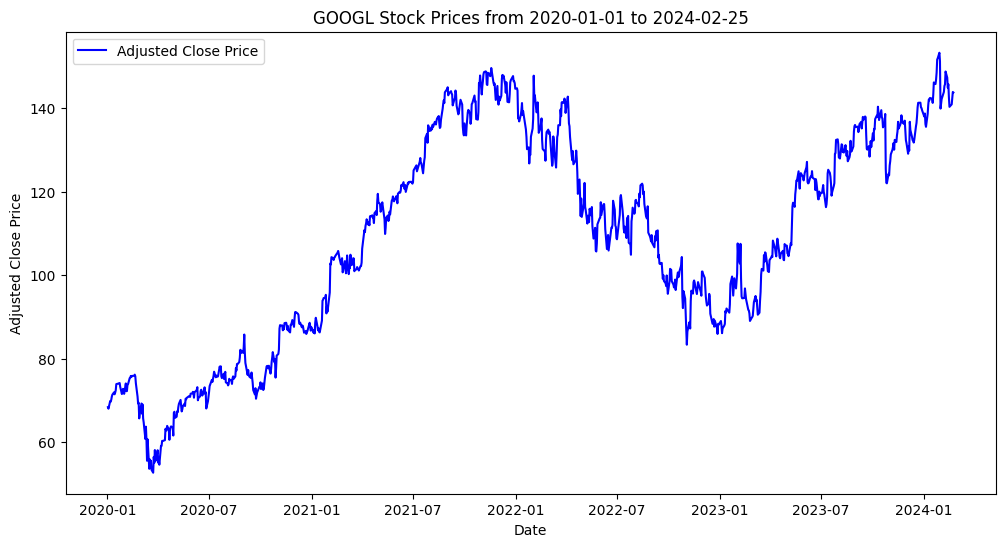

In [ ]:
import matplotlib.pyplot as plt

# Download stock data
ticker = 'GOOGL'
start_date = '2020-01-01'
end_date = '2024-02-25'
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the DataFrame
print(stock_data.head())

# Plotting the closing prices
plt.figure(figsize = (12, 6))
plt.plot(stock_data.index, stock_data['Adj Close'], label = 'Adjusted Close Price', color = 'blue')
plt.title(f'{ticker} Stock Prices from {start_date} to {end_date}')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

In [ ]:
# Preprocess data
sequence_length = 10
data_sequences = preprocess_data(stock_data, sequence_length)

<ipython-input-18-6fe08f2a7f4c>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target = data[i+sequence_length]


In [ ]:
# Split data into training and testing sets
train_data, test_data = split_data(data_sequences)

In [ ]:
# Prepare training data
X_train = np.array([item[0] for item in train_data])
y_train = np.array([item[1] for item in train_data])

# Train linear regression model
model = train_model(X_train, y_train)

In [ ]:
# Prepare testing data
X_test = np.array([item[0] for item in test_data])
y_test = np.array([item[1] for item in test_data])

# Example of using the trained model for prediction
last_sequence = X_test[-1].reshape(1, -1)
predicted_price = model.predict(last_sequence)[0]
print(f'\nPredicted Stock Price: {predicted_price}')


Predicted Stock Price: 143.93997742441744


In [ ]:
# Evaluate model using Mean Squared Error
mse = evaluate_model(model, X_test, y_test)

# Evaluate model using R-squared
r2 = r2_score(y_test, model.predict(X_test))

# Calculate Adjusted R-squared (adjusts for number of features)
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the R-squared and adjusted R-squared
print(f'\nR-squared: {r2:.4f}')
print(f'Adjusted R-squared: {adjusted_r2:.2f}')
print(f'Mean Squared Error on Test Data: {mse: 0.2f}')


R-squared: 0.9463
Adjusted R-squared: 0.94
Mean Squared Error on Test Data:  5.03


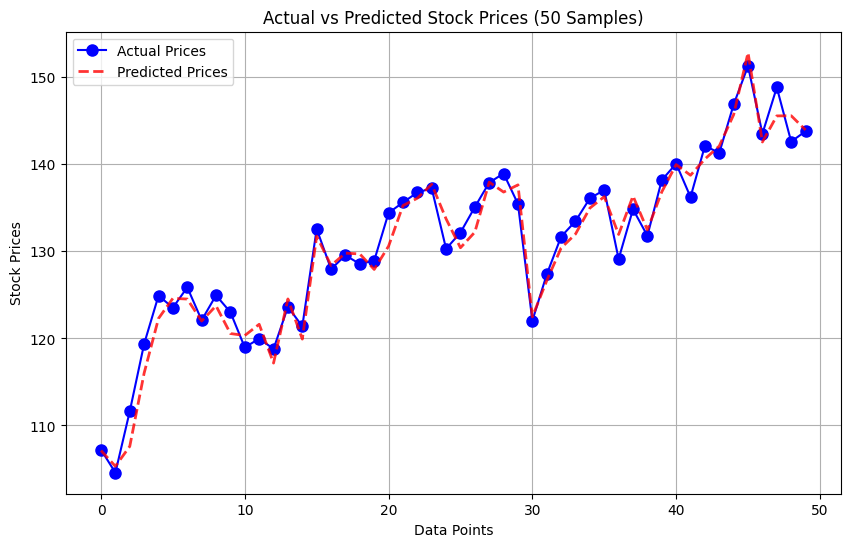

In [ ]:
import numpy as np

# Assuming your test data is available as X_test and y_test
# Predict the stock prices
y_pred = model.predict(X_test)

# Select a smaller sample size, e.g., 50 data points
sample_size = 50
sample_indices = np.linspace(0, len(X_test) - 1, sample_size, dtype=int)

# Extract the sample data for plotting
X_test_sample = X_test[sample_indices]
y_test_sample = y_test[sample_indices]
y_pred_sample = y_pred[sample_indices]

# Plotting the Actual vs Predicted stock prices for the sampled points
plt.figure(figsize=(10, 6))

# Plot actual prices with smaller markers
plt.plot(range(sample_size), y_test_sample, label='Actual Prices', color='b', marker='o', linestyle='-', markersize=8)

# Plot predicted prices with smoother lines and no markers
plt.plot(range(sample_size), y_pred_sample, label='Predicted Prices', color='r', linestyle='--', linewidth=2, alpha=0.8)

# Adding titles and labels
plt.title('Actual vs Predicted Stock Prices (50 Samples)')
plt.xlabel('Data Points')
plt.ylabel('Stock Prices')
plt.legend()  # Show legend
plt.grid(True)  # Show grid

# Show the plot
plt.show()